Аналитическое решение (точечные массы):
F = 1.981e+20 Н

Результаты метода Монте-Карло:


100%|██████████| 1000/1000 [00:00<00:00, 877469.46it/s]


N = 1000: F = 1.979e+20 Н, ошибка = 0.06%


100%|██████████| 5000/5000 [00:00<00:00, 375672.11it/s]


N = 5000: F = 1.981e+20 Н, ошибка = 0.02%


100%|██████████| 10000/10000 [00:00<00:00, 387977.10it/s]


N = 10000: F = 1.981e+20 Н, ошибка = 0.01%


100%|██████████| 50000/50000 [00:00<00:00, 529931.77it/s]


N = 50000: F = 1.981e+20 Н, ошибка = 0.00%


100%|██████████| 100000/100000 [00:00<00:00, 501982.41it/s]


N = 100000: F = 1.981e+20 Н, ошибка = 0.00%


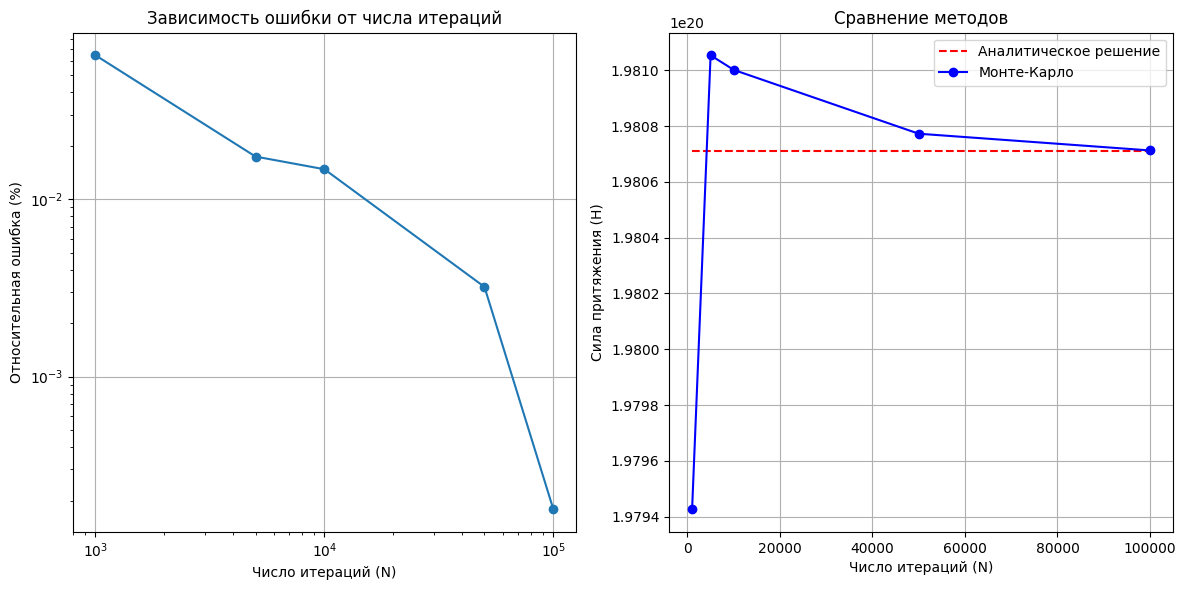

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Физические константы
G = 6.67e-11          # Гравитационная постоянная [Н·м²/кг²]
m_earth = 5.97e24     # Масса Земли [кг]
m_moon = 7.35e22      # Масса Луны [кг]
distance = 384.4e6    # Среднее расстояние между центрами [м]
R_earth = 6.371e6     # Радиус Земли [м]
R_moon = 1.737e6      # Радиус Луны [м]

# 1. Аналитический расчёт (точечные массы)
def analytical_force():
    """Вычисление силы по закону всемирного тяготения"""
    return G * m_earth * m_moon / distance**2

F_analytical = analytical_force()
print(f"Аналитическое решение (точечные массы):\nF = {F_analytical:.3e} Н\n")

# 2. Метод Монте-Карло (учёт распределения масс)
def monte_carlo_force(N, progress_bar=True):
    """
    Вычисление силы притяжения с учётом распределения масс
    
    Параметры:
        N (int): Количество случайных точек
        progress_bar (bool): Показывать прогресс-бар
        
    Возвращает:
        float: Сила притяжения [Н]
    """
    # Генерация случайных точек внутри тел
    def generate_points(N, R, offset=0):
        theta = np.random.uniform(0, 2*np.pi, N)
        phi = np.random.uniform(0, np.pi, N)
        r = R * np.random.uniform(0, 1, N)**(1/3)
        x = offset + r * np.sin(phi) * np.cos(theta)
        y = r * np.sin(phi) * np.sin(theta)
        z = r * np.cos(phi)
        return np.vstack((x, y, z)).T
    
    earth_points = generate_points(N, R_earth)
    moon_points = generate_points(N, R_moon, distance)
    
    # Вычисление среднего 1/r²
    iter_range = tqdm(range(N)) if progress_bar else range(N)
    sum_inv_r2 = 0.0
    
    for i in iter_range:
        dx = moon_points[i,0] - earth_points[i,0]
        dy = moon_points[i,1] - earth_points[i,1]
        dz = moon_points[i,2] - earth_points[i,2]
        r2 = dx**2 + dy**2 + dz**2
        sum_inv_r2 += 1/r2
    
    mean_inv_r2 = sum_inv_r2 / N
    return G * m_earth * m_moon * mean_inv_r2

# 3. Сравнение методов и анализ ошибки
def analyze_accuracy(N_values):
    """Анализ зависимости ошибки от числа итераций"""
    errors = []
    F_mc_values = []
    
    for N in N_values:
        F_mc = monte_carlo_force(N)
        error = abs(F_mc - F_analytical)/F_analytical * 100
        errors.append(error)
        F_mc_values.append(F_mc)
        print(f"N = {N}: F = {F_mc:.3e} Н, ошибка = {error:.2f}%")
    
    return F_mc_values, errors

# Параметры исследования
N_values = [1000, 5000, 10000, 50000, 100000]

print("Результаты метода Монте-Карло:")
F_mc_values, errors = analyze_accuracy(N_values)

# 4. Визуализация
plt.figure(figsize=(12, 6))

# График зависимости ошибки
plt.subplot(1, 2, 1)
plt.loglog(N_values, errors, 'o-')
plt.xlabel('Число итераций (N)')
plt.ylabel('Относительная ошибка (%)')
plt.title('Зависимость ошибки от числа итераций')
plt.grid(True)

# График сравнения с аналитическим решением
plt.subplot(1, 2, 2)
plt.plot(N_values, [F_analytical]*len(N_values), 'r--', label='Аналитическое решение')
plt.plot(N_values, F_mc_values, 'bo-', label='Монте-Карло')
plt.xlabel('Число итераций (N)')
plt.ylabel('Сила притяжения (Н)')
plt.title('Сравнение методов')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()